In [1]:
# oblig import sequence
import sys
sys.path.append('../src')
import pickle
import matplotlib.pyplot as plt
from Models import *

In [2]:
V5 = pickle.load(open('../data/V5.p','rb'))
cp_list = V5["cp_list"]
active_L_table_slide_DOA = V5["active_L_table_slide_DOA"]
active_L_table_slide_matrix = V5["active_L_table_slide_matrix"]
active_long_table_slide_DOA = V5["active_long_table_slide_DOA"]
active_long_table_slide_matrix = V5["active_long_table_slide_matrix"]

In [3]:
# gather control points
control_points = cp_list[:4]
coordinates = [np.array([i[0], i[1]]) for i in ROOM_COORDINATES[:4]]
# consolidate into single arrats
X = np.vstack([c for c in cp_list[:4]])
y = np.vstack([np.full([p.shape[0], len(c)], c) for p, c in zip(control_points, coordinates)])

`X` is a stacked `np` array of the control points measurements and `y` is a stack of the coordinates all stacked into big repeating rows to use as "labels"

In [4]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

Using `MultiOutput` instead of normal SVR to accomodate for the fact that we're transforming $15 \to 2$

In [5]:
regr = MultiOutputRegressor(SVR())
regr.fit(X, y)

C:\Users\kazzh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kazzh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
           n_jobs=None)

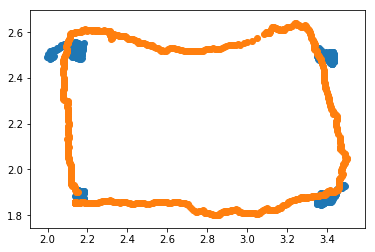

In [6]:
plt.scatter(*regr.predict(X).T)
plt.scatter(*regr.predict(active_L_table_slide_DOA).T)